# Now we working on META Datasets

<img src="Logos/Meta_Logo.png" width="300" height="200">

## Steps to build this project

- 1 First load essential Moduels 
- 2 Load Dataset 
- 3 Check information about dataset 
- 4 Make date as index 
- 5 plotting close data with date 
- 6 Split data into Train-Test 
- 7 Create different regression model and check R2 score 
- 8 Select those model who gave good R2 score 
- 9 From those Model create a ensemble model for this we use voting regression model 
- 10 Check R2 score of that ensemble model 
- 11 Save it on Pickle and Joblib File 
- 12 Testing Saved model on random data 

In [2]:
#import essential modules 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading essential modules for dataset 

meta = pd.read_csv("new dataset/Preprocessed_META_Dataset.csv")
meta.info()

meta['date'] = pd.to_datetime(meta['date'])
meta.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3124 non-null   object 
 1   open    3124 non-null   float64
 2   high    3124 non-null   float64
 3   low     3124 non-null   float64
 4   close   3124 non-null   float64
 5   volume  3124 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 146.6+ KB


In [4]:
meta.sample(4)

,open,high,low,close,volume
date,,,,,
2019-10-22,189.4316,190.0796,180.9570,181.7945,19854192
2016-01-12,98.7038,99.6610,97.2582,99.0727,28395390
2013-01-29,31.9043,31.9741,30.6181,30.6979,72976500
2022-09-15,149.3518,153.7371,148.2551,149.1026,34389011


## Plotting Close Data

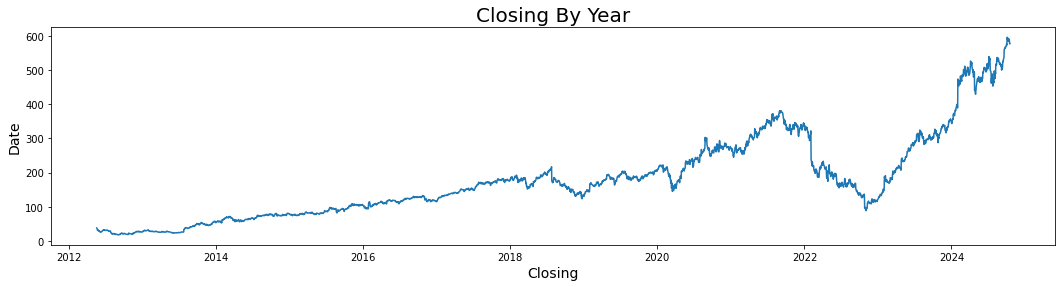

In [6]:
plt.figure(figsize=(18,4))
plt.title("Closing By Year",fontsize=20)
plt.xlabel('Closing',fontsize = 14)
plt.ylabel('Date',fontsize = 14)
plt.plot(meta['close'])
plt.show()

## Ploting Volume

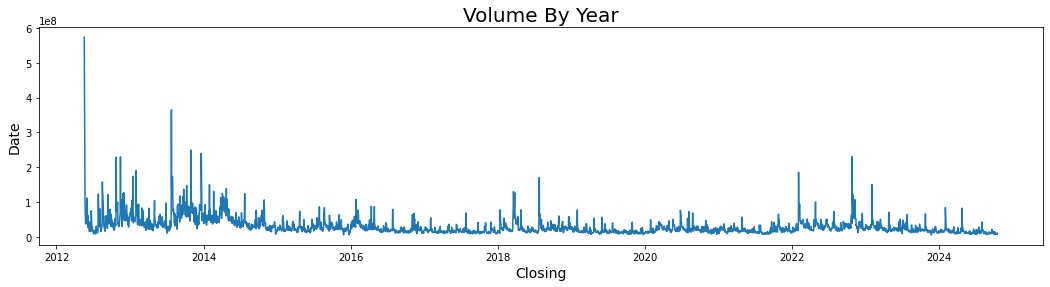

In [7]:
plt.figure(figsize=(18,4))
plt.title("Volume By Year",fontsize=20)
plt.xlabel('Closing',fontsize = 14)
plt.ylabel('Date',fontsize = 14)
plt.plot(meta['volume'])
plt.show()

## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
features = ['open','high','low','volume']
x = meta[features]
y = meta['close']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle=False)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2499, 4)
(625, 4)
(2499,)
(625,)


# Machine Learning (Regression) on META Dataset 

## 1) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(xtrain,ytrain)
ypred = modellr.predict(xtest)
from sklearn.metrics import r2_score
r2_0 = r2_score(ytest,ypred)
print(f"R2 Score of Linear Regression : {r2_0}")

R2 Score of Linear Regression : 0.9997088438386881


### Plotting Regression 

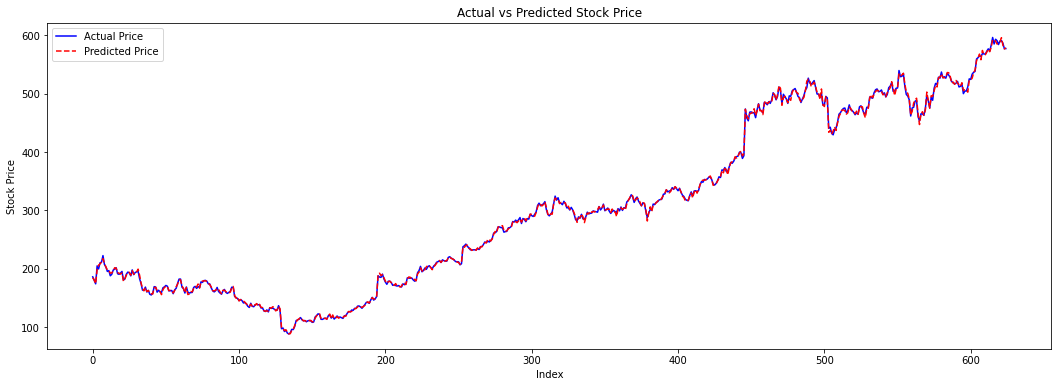

In [10]:
y_pred = np.squeeze(np.array(ypred))
y_test = np.array(ytest)
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.show()

## 2) Ridge Regresion

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(xtrain, ytrain)
ypred1 = ridge_reg.predict(xtest)

r2_1 = r2_score(ytest,ypred1)
print(f"R2 Score of Ridge Regression (L2 regularization) = {r2_1}")

R2 Score of Ridge Regression (L2 regularization) = 0.9997088421789668


## 3) Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(xtrain, ytrain)
ypred2 = lasso_reg.predict(xtest)
r2_2 = r2_score(ytest,ypred2)
print(f"R2 Score of Lasso Regression (L1 regularization) = {r2_2}")

R2 Score of Lasso Regression (L1 regularization) = 0.9990721359333541


## 4) Elastic Net Regression

In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(xtrain, ytrain)
ypred3 = elastic_net.predict(xtest)
r2_3 = r2_score(ytest,ypred3)
print(f"R2 Score of Elastic Net Regression = {r2_3}")

R2 Score of Elastic Net Regression = 0.9990764973787536


## 5) KNN Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(xtrain,ytrain)
ypred9 = knn_reg.predict(xtest)
r2_9 = r2_score(ytest,ypred9)
print(f"R2 Score of KNN Regression = {r2_9}")

R2 Score of KNN Regression = -0.7507659827654984


## R2 Score of all Regression model is :- 

| Regression Model         | R2 Score         |
|--------------------------|------------------|
|1) Linear Regression      |0.9992315300913325|
|2) Ridge Regression       |0.9992317269769614|
|3) Lasso Regression       |0.9973035403402394|
|4) Elastic Net Regression |0.9973876081990091|

# Ensemble Model 

In [15]:
#import ml model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score
#making machine 
modellr = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

#loading voting regressor modules 
from sklearn.ensemble import VotingRegressor

#creating voting ensemble model 
votingmodel = VotingRegressor([
    ('lr',modellr),
    ('rr',ridge_reg),
    ('lar',lasso_reg),
    ('enr',elastic_net)
])

#train voting model 
votingmodel.fit(xtrain,ytrain)

yprediction = votingmodel.predict(xtest)
R2_score = r2_score(ytest,yprediction)
print(f"R2 Score of a voting model :{R2_score}")

R2 Score of a voting model :0.9995471963599687


## Plotting Voting Ensemble Model Regreesion 

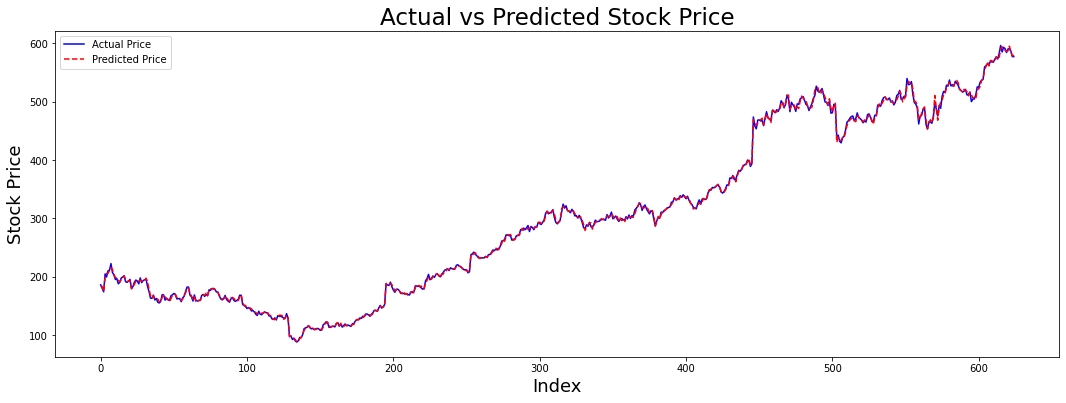

In [16]:
# Assuming y_test is a pandas Series, y_pred is a numpy array or multi-dimensional structure
import matplotlib.pyplot as plt
# Convert y_pred to a 1D numpy array (if it's not already)
y_pred = np.squeeze(np.array(yprediction))  # Flatten if it's multi-dimensional

# Ensure y_test is aligned (if y_test is a pandas Series)
y_test = np.array(ytest)  # You can convert it to a numpy array if needed
plt.figure(figsize=(18,6))
# Plot the actual vs predicted values
plt.plot(np.arange(len(ytest)), ytest, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Index',fontsize=18)
plt.ylabel('Stock Price',fontsize=18)
plt.title('Actual vs Predicted Stock Price',fontsize=23)
plt.legend()

# Display the plot
plt.show()

# Save model on Pickle 

In [17]:
import pickle
# Specify the filename
filename = "Models/META_ensemble_model.pkl"

# Open the file in write-binary mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(votingmodel, file)
    
# Load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use loaded_model to make predictions
predictions = loaded_model.predict(xtest)
predictions

array([183.96493118, 183.00964391, 174.97718364, 200.50844498,
       205.99342084, 206.13722648, 210.93632661, 215.72977938,
       213.03512547, 204.78978787, 198.60639998, 198.22782878,
       194.3865215 , 191.38734695, 195.29701044, 200.38002159,
       201.48406829, 196.05364812, 191.98247295, 192.66094782,
       193.64950803, 179.49513635, 181.98850989, 187.43156404,
       192.10097126, 194.31397129, 192.29469217, 194.31968034,
       192.81031496, 192.34190527, 193.52499808, 197.86718186,
       191.7368024 , 178.78576965, 168.09816584, 163.69341434,
       167.85855269, 161.99923167, 162.57271784, 161.81180534,
       157.70228499, 156.63214839, 165.54983837, 169.37861828,
       165.90937875, 163.00394167, 161.5647841 , 157.47232757,
       162.66165503, 168.21097428, 169.85005484, 169.84992665,
       164.36751725, 163.59102017, 161.99802487, 159.60458105,
       162.06174619, 168.34516813, 172.71307527, 179.82819208,
       180.89843605, 171.6561186 , 167.33628953, 161.78

In [18]:
#r2 score 
r2scoree = r2_score(ytest,predictions)
print(f"R2 Score of pickle ensemble model : {r2scoree}")

R2 Score of pickle ensemble model : 0.9995471963599687


## Save Model on Joblib

In [19]:
import joblib

# Save the model to a file
joblib.dump(votingmodel, 'Models/META_ensemble_model.joblib')
# Load the model from the file
loaded_model = joblib.load('Models/META_ensemble_model.joblib')

# Now you can use loaded_model to make predictions
predictions = loaded_model.predict(xtest)
predictions

array([183.96493118, 183.00964391, 174.97718364, 200.50844498,
       205.99342084, 206.13722648, 210.93632661, 215.72977938,
       213.03512547, 204.78978787, 198.60639998, 198.22782878,
       194.3865215 , 191.38734695, 195.29701044, 200.38002159,
       201.48406829, 196.05364812, 191.98247295, 192.66094782,
       193.64950803, 179.49513635, 181.98850989, 187.43156404,
       192.10097126, 194.31397129, 192.29469217, 194.31968034,
       192.81031496, 192.34190527, 193.52499808, 197.86718186,
       191.7368024 , 178.78576965, 168.09816584, 163.69341434,
       167.85855269, 161.99923167, 162.57271784, 161.81180534,
       157.70228499, 156.63214839, 165.54983837, 169.37861828,
       165.90937875, 163.00394167, 161.5647841 , 157.47232757,
       162.66165503, 168.21097428, 169.85005484, 169.84992665,
       164.36751725, 163.59102017, 161.99802487, 159.60458105,
       162.06174619, 168.34516813, 172.71307527, 179.82819208,
       180.89843605, 171.6561186 , 167.33628953, 161.78

## Testing saved Model on Sample Data 

In [20]:
meta.sample(4)

,open,high,low,close,volume
date,,,,,
2014-08-04,72.1435,73.6590,72.1435,73.2901,30656900
2016-02-22,105.1744,107.9262,105.0249,106.8394,35709714
2021-05-12,300.2291,304.0477,297.2979,301.6449,24641010
2014-09-08,77.0289,77.9361,76.7796,77.6570,28149300


## Pickle Model 

In [22]:
import pickle 
filename = "Models/META_ensemble_model.pkl"
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
    
sample = np.array([105.1744, 107.9262, 105.0249, 35709714])
sample_reshaped = pd.DataFrame([sample], columns=['open','high','low','volume'])
prediction = loaded_model.predict(sample_reshaped)
print(prediction[0])

106.53043924720747


## Joblib Model

In [23]:
import joblib

amzn_model = joblib.load("Models/META_ensemble_model.joblib")
prediction2 = amzn_model.predict(sample_reshaped)
print(prediction2[0])

106.53043924720747


## Closing Statement

In this project, we delved into the realm of stock price prediction, focusing on Amazon's stock data. By leveraging the power of ensemble learning, specifically a voting ensemble model, we aimed to construct a robust and accurate predictive model. 

Through meticulous data preprocessing, feature engineering, and model training, we achieved promising results. The voting ensemble model, composed of multiple diverse base models, demonstrated superior performance in predicting future stock closing prices.

We believe that this work contributes to the ongoing research in stock market prediction and offers valuable insights for investors and financial analysts. 

**Footnote:**

*This project was completed by **Geetanshu Dev Meshram** on [2 November 2024].*